In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
# Make the graphs a bit prettier, and bigger
plt.rcParams['figure.figsize'] = (15, 5)

### Installing NLTK toolkit

Before starting let's install the NLTK library (http://www.nltk.org/), by typing the following commands in vagrant terminal.

* Install Numpy: `sudo -H pip3 install -U numpy`
* Install NLTK: `sudo -H pip3 install -U nltk`
* Install Tkinter: `sudo -H apt-get -y install python3-tk`

Test that the library is installed properly by executing the following command:

Once the NLTK toolkit is installed, we need to install the NLTK data: 

`sudo python -m nltk.downloader -d /usr/share/nltk_data all`

In [2]:
!sudo python3 -m nltk.downloader -d /usr/share/nltk_data all

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_es

#### Extra NLTK resources

NLTK also comes with some of the files from Project Gutenberg already included:

In [5]:
import nltk

In [6]:
print(nltk.corpus.gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [7]:
alice  = nltk.corpus.gutenberg.words('carroll-alice.txt')
len(alice)

34110

In [8]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [9]:
len(text4)

145735

It is one thing to automatically detect that a particular word occurs in a text, and to display some words that appear in the same context. However, we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. You can produce this plot as shown below. You might like to try more words (e.g., liberty, constitution), and different texts. Can you predict the dispersion of a word before you view it? 

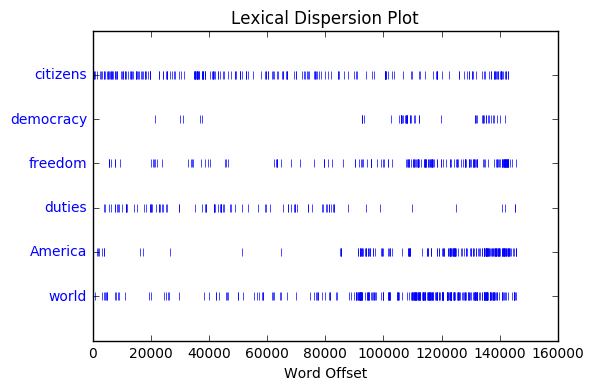

In [12]:
# Text4 is the inauguration addresses
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America", "world"])

#### Exercise

* Pick your own book and create a dispersion plot for your keywords of choice.

In [ ]:
# Your code here
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
t_alice = nltk.Text(alice)
t_alice.dispersion_plot(["rabbit", "Alice", "hole", "Queen"])

In [ ]:
text7.dispersion_plot(["she", "he", "He", "She"])

### Processing Text: Introduction 

Let's start by fetching a piece of text. We will go to [Project Gutenberg](https://www.gutenberg.org/) and fetch the text for "The origin of species"

In [102]:
import requests

# The origin of species
# Original at http://www.gutenberg.org/cache/epub/1228/pg1228.txt but there seems to be 
# some problem with downloading from Amazon EC2
# url = "http://www.gutenberg.org/cache/epub/1228/pg1228.txt"
url = "https://dl.dropboxusercontent.com/u/16006464/DwD_Winter2015/1228.txt"

# Get the URL, do not check the SSL certificate
resp = requests.get(url)

# Get the text
content = resp.text


In [103]:
# The text contains template stuff at the beginning and end. Let's get rid of these
start_phrase = "*** START OF THIS PROJECT GUTENBERG EBOOK ON THE ORIGIN OF SPECIES ***"
end_phrase = "*** END OF THIS PROJECT GUTENBERG EBOOK ON THE ORIGIN OF SPECIES ***"
s = content.index(start_phrase)
e = content.index(end_phrase)
true_content = content[s+len(start_phrase):e]

# Approximate bytes of text
print len(true_content)

951128


### Frequency distributions, Zipf's law

Now, we have our first text ready to be analyzed. Let's first do some analysis of the words that appear in this classic text:

In [104]:
tokens = true_content.split()

# The nltk.Text object will offer us many useful functions for text analysis
text = nltk.Text(tokens)

# Frequency analysis for words of interest
fdist = text.vocab()

# Number of unique and total words in the text
print(fdist)

<FreqDist with 13908 samples and 155443 outcomes>


Let's take a look at the frequencies of some words in the text:

In [ ]:
print fdist["species"]
print fdist["sexual"]
print fdist["origin"]

Let's take a look at the actual words of the text:

In [ ]:
fdist

OK, let's see a few more words

In [ ]:
print fdist.most_common(50)

Hm, that is not very useful. These are all words that are needed by every single English text. Only the world "species" seems to have some meaning. The rest of the words tell us nothing about the text; they're just English "plumbing."

What proportion of the text is taken up with such words? We can generate a cumulative frequency plot for these words:


In [ ]:
fdist.plot(50, cumulative=True)

These 50 words account for nearly half the book! (If you rememeber, we had 155443 words in the book)

If the frequent words don't help us, how about the words that occur once only, the so-called hapaxes? View them by typing `fdist.hapaxes()`: 

In [ ]:
fdist.hapaxes()

OK, we have a problem. We generated the words of the text by doing a simple `split()`. So our "words" also contain punctuation, and words with different capitalization are considered difference.

### Normalization and Tokenization

So, in order to to proper analysis we need to remove from the document all the punctuation. However, keeping only alphanumeric characters will break things like `B.Sc.` `N.Y.U.` and so on. The process of properly splitting the document into appropriate basic elements is called `tokenization`.

NLTK gives us a (set of ) function call(s) that can do the tokenization (see also http://www.nltk.org/_modules/nltk/tokenize.html):

In [3]:
example = '''Good bagels cost $2.88 in New York.  
    Hey Prof. Ipeirotis, please buy me two of them.
    
    Thanks.
    
    PS: You have a Ph.D., you can handle this, right?'''

print nltk.word_tokenize(example)

['Good', 'bagels', 'cost', '$', '2.88', 'in', 'New', 'York', '.', 'Hey', 'Prof.', 'Ipeirotis', ',', 'please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.', 'PS', ':', 'You', 'have', 'a', 'Ph.D.', ',', 'you', 'can', 'handle', 'this', ',', 'right', '?']


In [ ]:
s1 = "On a $50,000 mortgage of 30 years at 8 percent, the monthly payment would be $366.88."
print nltk.word_tokenize(s1)

In [ ]:
s2 = "\"We beat some pretty good teams to get here,\" Slocum said."
print nltk.word_tokenize(s2)

In [ ]:
s3 = "Well, we couldn't have this predictable, cliche-ridden, \"Touched by an Angel\" (a show creator John Masius worked on) wanna-be if she didn't."
print nltk.word_tokenize(s3)

In [ ]:
s4 = "I cannot cannot work under these conditions!"
print nltk.word_tokenize(s4)

In [ ]:
s5 = "The company spent $30,000,000 last year."
print nltk.word_tokenize(s5)

In [ ]:
s6 = "The company spent 40.75% of its income last year."
print nltk.word_tokenize(s6)

In [ ]:
s7 = "He arrived at 3:00 pm."
print nltk.word_tokenize(s7)

In [ ]:
s8 = "I bought these items: books, pencils, and pens."
print nltk.word_tokenize(s8)

In [ ]:
s9 = "Though there were 150, 100 of them were old."
print nltk.word_tokenize(s9)

In [ ]:
s10 = "There were 300,000, but that wasn't enough."
print nltk.word_tokenize(s10)

So, let's repeat the process now for our original text:

In [ ]:
# We tokenize and we also convert to lowercase for further normalization
tokens = nltk.word_tokenize(true_content.lower())
text = nltk.Text(tokens)

# Frequency analysis for words of interest
fdist = text.vocab()

# Number of unique and total words in the text
print(fdist)

We went from `13908 samples and 155443 outcomes` to `7687 samples and 175682 outcomes`. In other words, we have now 7687 unique tokens, and a set of 175682 tokens, as punctuation characters are now separate tokens.

In [ ]:
print fdist.most_common(50)

In [ ]:
print fdist.hapaxes()

In [ ]:
print len (fdist.hapaxes())

So out of the 7687 unique words, 2666 of them appear only once in the text. But these are only 2666 out of the total of 175682 words in the text. This is ~1.5% of the text.

#### Sentence splitting

The tokenization process can also work on separating sentences

In [ ]:
example = '''Good bagels cost $2.88 in N.Y.C. Hey Prof. Ipeirotis, please buy me two of them.
    
    Thanks.
    
    PS: You have a Ph.D. you can handle this, right?'''

print nltk.sent_tokenize(example)

#### Zipf's Law

Zipf's law says that the frequencies of words in text follow a power-law: A few words account for a big fraction of the text (the very frequent ones, usually just the "plumping" of English), and a large fraction of the unique vocabularly (the "hapaxes") appear very infrequently.

In [ ]:
fdist.plot(100, cumulative=False)

In [ ]:
fdist.plot(100, cumulative=True)

#### Normalization: Stopwords

NLTK contains a corpus of stopwords, that is, high-frequency words like `the`, `to` and `also` that we sometimes want to filter out of a document before further processing. Stopwords usually have little lexical content, and their presence in a text fails to distinguish it from other texts.

In [1]:
from nltk.corpus import stopwords

print stopwords.words('english')



[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u'her', u'hers', u'herself', u'it', u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'both', u'each', u'few', u'more', u'most', u'other', u'some', u'such', u'no', u'nor', u

Let's define a function to remove the words in a text are in the stopwords list:

In [ ]:
mystops = []
mystops.append('one')
mystops.append('may')
mystops.append('would')
mystops.append('many')

def remove_stopwords(text, hapaxes):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text 
               if w.lower() not in stopwords \ # w should not be in NLTK stopwords
                   and w.lower() not in mystops # w should not be in custom stop word list
                   and w.isalpha() \ # w should consists of letters, not numbers, not punctuation
                   and w.lower() not in hapaxes] # w should have frequency > 1 
    return nltk.Text(content)

text_nostopwords = remove_stopwords(text, fdist.hapaxes())
fdist_nostopwords = text_nostopwords.vocab()
print fdist_nostopwords

In [ ]:
print fdist_nostopwords.most_common(50)

In [ ]:
fdist_nostopwords.plot(100, cumulative=True)

#### Normalization: Stemming 

So far, the only normalization that we did is to convert text to lowercase before doing anything with its words, e.g. `set(w.lower() for w in text)`. By using lower(), we have normalized the text to lowercase so that the distinction between `The` and `the` is ignored. Often we want to go further than this, and strip off any affixes, a task known as **stemming**. 

NLTK includes several off-the-shelf stemmers, and if you ever need a stemmer you should use one of these. The Porter stemmer is a very well-known stemmer, and should suffice for most of our applications. 


In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""

tok = nltk.word_tokenize(raw)

porter = nltk.PorterStemmer()
stemmed =  [porter.stem(t) for t in tok]

# This idiom concatenates all the words in a list. 
# The call is s.join(list), where we join the element 
# of the list using the string s as the concatenacting character
print " ".join(stemmed) 

#### Normalization: Lemmatization

A further step in the normalization process is to make sure that the resulting form is a known word in a dictionary, a task known as **lemmatization**. The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman.

In [ ]:
raw = """DENNIS: Listen, strange women lying in ponds distributing swords
is no basis for a system of government.  Supreme executive power derives from
a mandate from the masses, not from some farcical aquatic ceremony."""
tok = nltk.word_tokenize(raw)

wnl = nltk.WordNetLemmatizer()
lemmatized =  [wnl.lemmatize(t) for t in tok]
print " ".join(lemmatized) 

But what is this WordNet? It is one of the most useful resources for anyone interested in analyzing text at a more semantic level than simply frequency counts

### WordNet

WordNet is a semantically-oriented dictionary of English, similar to a traditional thesaurus but with a richer structure. NLTK includes the English WordNet, with 155,287 words and 117,659 synonym sets. We'll begin by looking at synonyms and how they are accessed in WordNet.

####  Senses and Synonyms

Consider the sentence below. If we replace the word motorcar in by automobile, the meaning of the sentence stays pretty much the same:

* Benz is credited with the invention of the motorcar.
* Benz is credited with the invention of the automobile.

Since everything else in the sentence has remained unchanged, we can conclude that the words motorcar and automobile have the same meaning, i.e. they are **synonyms**. We can explore these words with the help of WordNet:

In [2]:
from nltk.corpus import wordnet as wn
wn.synsets('motorcar')

[Synset('car.n.01')]

Thus, motorcar has just one possible meaning and it is identified as car.n.01, the first noun sense of car. The entity car.n.01 is called a **synset**, or **"synonym set"**, a collection of synonymous words (or "lemmas"):

In [3]:
 wn.synset('car.n.01').lemma_names()

[u'car', u'auto', u'automobile', u'machine', u'motorcar']

Each word of a synset can have several meanings, e.g., car can also signify a train carriage, a gondola, or an elevator car. However, we are only interested in the single meaning that is common to all words of the above synset. Synsets also come with a prose definition and some example sentences:

In [4]:
wn.synset('car.n.01').definition()

u'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [5]:
wn.synset('car.n.01').examples()

[u'he needs a car to get to work']

Although definitions help humans to understand the intended meaning of a synset, the words of the synset are often more useful for our programs. To eliminate ambiguity, we will identify these words as car.n.01.automobile, car.n.01.motorcar, and so on. This pairing of a synset with a word is called a **lemma**. We can get all the lemmas for a given synset, look up a particular lemma, get the synset corresponding to a lemma, and get the "name" of a lemma:

In [7]:
wn.synset('car.n.01').lemmas() 

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

In [8]:
wn.lemma('car.n.01.automobile')

Lemma('car.n.01.automobile')

In [10]:
wn.lemma('car.n.01.automobile').synset()

Synset('car.n.01')

In [11]:
wn.lemma('car.n.01.automobile').name()

u'automobile'

Now let's analyze the word `car`, which has multiple **senses** (ie., meanings of the word)

In [13]:
wn.synsets('car')

[Synset('car.n.01'),
 Synset('car.n.02'),
 Synset('car.n.03'),
 Synset('car.n.04'),
 Synset('cable_car.n.01')]

In [12]:
senses = [(s.lemma_names(), s.definition(), s.examples()) for s in wn.synsets('car')]
for s in senses:
    print "Lemma name:", s[0]
    print "Definition:", s[1]
    print "Examples  :", s[2]
    print "======================="

Lemma name: [u'car', u'auto', u'automobile', u'machine', u'motorcar']
Definition: a motor vehicle with four wheels; usually propelled by an internal combustion engine
Examples  : [u'he needs a car to get to work']
Lemma name: [u'car', u'railcar', u'railway_car', u'railroad_car']
Definition: a wheeled vehicle adapted to the rails of railroad
Examples  : [u'three cars had jumped the rails']
Lemma name: [u'car', u'gondola']
Definition: the compartment that is suspended from an airship and that carries personnel and the cargo and the power plant
Examples  : []
Lemma name: [u'car', u'elevator_car']
Definition: where passengers ride up and down
Examples  : [u'the car was on the top floor']
Lemma name: [u'cable_car', u'car']
Definition: a conveyance for passengers or freight on a cable railway
Examples  : [u'they took a cable car to the top of the mountain']


In [14]:
## your code here: Analyze the word "bank"
senses = [(s.lemma_names(), s.definition(), s.examples()) for s in wn.synsets('bank')]
for s in senses:
    print "Lemma name:", s[0]
    print "Definition:", s[1]
    print "Examples  :", s[2]
    print "======================="

Lemma name: [u'bank']
Definition: sloping land (especially the slope beside a body of water)
Examples  : [u'they pulled the canoe up on the bank', u'he sat on the bank of the river and watched the currents']
Lemma name: [u'depository_financial_institution', u'bank', u'banking_concern', u'banking_company']
Definition: a financial institution that accepts deposits and channels the money into lending activities
Examples  : [u'he cashed a check at the bank', u'that bank holds the mortgage on my home']
Lemma name: [u'bank']
Definition: a long ridge or pile
Examples  : [u'a huge bank of earth']
Lemma name: [u'bank']
Definition: an arrangement of similar objects in a row or in tiers
Examples  : [u'he operated a bank of switches']
Lemma name: [u'bank']
Definition: a supply or stock held in reserve for future use (especially in emergencies)
Examples  : []
Lemma name: [u'bank']
Definition: the funds held by a gambling house or the dealer in some gambling games
Examples  : [u'he tried to break th

#### The WordNet Hierarchy

WordNet synsets correspond to abstract concepts, and they don't always have corresponding words in English. These concepts are linked together in a hierarchy. Some concepts are very general, such as Entity, State, Event — these are called unique beginners or root synsets. Others, such as gas guzzler and hatchback, are much more specific. A small portion of a concept hierarchy is illustrated below:

<img src="http://www.nltk.org/images/wordnet-hierarchy.png" width="50%">

#### Hyponyms

WordNet makes it easy to navigate between concepts. For example, given a concept like motorcar, we can look at the concepts that are more specific; the (immediate) hyponyms.

In [38]:

motorcar = wn.synset('car.n.01')

In [39]:
types_of_motorcar = motorcar.hyponyms()
types_of_motorcar

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [40]:
types_of_motorcar[0]

Synset('ambulance.n.01')

In [41]:
print sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

[u'Model_T', u'S.U.V.', u'SUV', u'Stanley_Steamer', u'ambulance', u'beach_waggon', u'beach_wagon', u'bus', u'cab', u'compact', u'compact_car', u'convertible', u'coupe', u'cruiser', u'electric', u'electric_automobile', u'electric_car', u'estate_car', u'gas_guzzler', u'hack', u'hardtop', u'hatchback', u'heap', u'horseless_carriage', u'hot-rod', u'hot_rod', u'jalopy', u'jeep', u'landrover', u'limo', u'limousine', u'loaner', u'minicar', u'minivan', u'pace_car', u'patrol_car', u'phaeton', u'police_car', u'police_cruiser', u'prowl_car', u'race_car', u'racer', u'racing_car', u'roadster', u'runabout', u'saloon', u'secondhand_car', u'sedan', u'sport_car', u'sport_utility', u'sport_utility_vehicle', u'sports_car', u'squad_car', u'station_waggon', u'station_wagon', u'stock_car', u'subcompact', u'subcompact_car', u'taxi', u'taxicab', u'tourer', u'touring_car', u'two-seater', u'used-car', u'waggon', u'wagon']


#### Hypernyms

We can also navigate up the hierarchy by visiting hypernyms. Some words have multiple paths, because they can be classified in more than one way. There are two paths between car.n.01 and entity.n.01 because wheeled_vehicle.n.01 can be classified as both a vehicle and a container.

In [42]:
motorcar.hypernyms()
paths = motorcar.hypernym_paths()
len(paths)

2

In [43]:
print [synset.name() for synset in paths[0]]

[u'entity.n.01', u'physical_entity.n.01', u'object.n.01', u'whole.n.02', u'artifact.n.01', u'instrumentality.n.03', u'container.n.01', u'wheeled_vehicle.n.01', u'self-propelled_vehicle.n.01', u'motor_vehicle.n.01', u'car.n.01']


In [44]:
print [synset.name() for synset in paths[1]]

[u'entity.n.01', u'physical_entity.n.01', u'object.n.01', u'whole.n.02', u'artifact.n.01', u'instrumentality.n.03', u'conveyance.n.03', u'vehicle.n.01', u'wheeled_vehicle.n.01', u'self-propelled_vehicle.n.01', u'motor_vehicle.n.01', u'car.n.01']


#### More Lexical Relations: Meronyms, Holonyms, Antonyms, Entailment

Hypernyms and hyponyms are called lexical relations because they relate one synset to another. These two relations navigate up and down the "is-a" hierarchy. Another important way to navigate the WordNet network is from items to their components (**meronyms**) or to the things they are contained in (**holonyms**). For example, the parts of a tree are its trunk, crown, and so on; the part_meronyms(). The substance a tree is made of includes heartwood and sapwood; the substance_meronyms(). A collection of trees forms a forest; the member_holonyms():

In [55]:
wn.synset('tree.n.01').part_meronyms()

[Synset('burl.n.02'),
 Synset('crown.n.07'),
 Synset('limb.n.02'),
 Synset('stump.n.01'),
 Synset('trunk.n.01')]

In [56]:
wn.synset('tree.n.01').member_holonyms()

[Synset('forest.n.01')]

In [57]:
wn.synset('tree.n.01').substance_meronyms()

[Synset('heartwood.n.01'), Synset('sapwood.n.01')]

In [58]:
wn.synsets("USA")

[Synset('united_states.n.01'), Synset('united_states_army.n.01')]

In [59]:
wn.synset('united_states.n.01').part_meronyms()

[Synset('alabama.n.01'),
 Synset('alaska.n.01'),
 Synset('american_state.n.01'),
 Synset('arizona.n.01'),
 Synset('arkansas.n.01'),
 Synset('california.n.01'),
 Synset('colony.n.03'),
 Synset('colorado.n.01'),
 Synset('connecticut.n.01'),
 Synset('connecticut.n.02'),
 Synset('dakota.n.02'),
 Synset('delaware.n.04'),
 Synset('district_of_columbia.n.01'),
 Synset('east.n.03'),
 Synset('florida.n.01'),
 Synset('georgia.n.01'),
 Synset('great_lakes.n.01'),
 Synset('hawaii.n.01'),
 Synset('idaho.n.01'),
 Synset('illinois.n.01'),
 Synset('indiana.n.01'),
 Synset('iowa.n.02'),
 Synset('kansas.n.01'),
 Synset('kentucky.n.01'),
 Synset('louisiana.n.01'),
 Synset('louisiana_purchase.n.01'),
 Synset('maine.n.01'),
 Synset('maryland.n.01'),
 Synset('massachusetts.n.01'),
 Synset('michigan.n.01'),
 Synset('mid-atlantic_states.n.01'),
 Synset('midwest.n.01'),
 Synset('minnesota.n.01'),
 Synset('mississippi.n.01'),
 Synset('mississippi.n.02'),
 Synset('missouri.n.01'),
 Synset('missouri.n.02'),
 Syns

To see just how intricate things can get, consider the word mint, which has several closely-related senses. We can see that mint.n.04 is part of mint.n.02 and the substance from which mint.n.05 is made.

In [60]:
for synset in wn.synsets('mint', wn.NOUN):
    print(synset.name() + ':', synset.definition())

(u'batch.n.02:', u"(often followed by `of') a large number or amount or extent")
(u'mint.n.02:', u'any north temperate plant of the genus Mentha with aromatic leaves and small mauve flowers')
(u'mint.n.03:', u'any member of the mint family of plants')
(u'mint.n.04:', u'the leaves of a mint plant used fresh or candied')
(u'mint.n.05:', u'a candy that is flavored with a mint oil')
(u'mint.n.06:', u'a plant where money is coined by authority of the government')


In [61]:
wn.synset('mint.n.04').part_holonyms()

[Synset('mint.n.02')]

In [62]:
wn.synset('mint.n.04').substance_holonyms()

[Synset('mint.n.05')]

There are also relationships between verbs. For example, the act of walking involves the act of stepping, so walking **entails** stepping. Some verbs have multiple entailments:

In [64]:
wn.synset('walk.v.01').entailments()

[Synset('step.v.01')]

In [65]:
wn.synset('eat.v.01').entailments()

[Synset('chew.v.01'), Synset('swallow.v.01')]

In [66]:
wn.synset('tease.v.03').entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

Some lexical relationships hold between lemmas, e.g., **antonymy**:

In [67]:
wn.lemma('supply.n.02.supply').antonyms()

[Lemma('demand.n.02.demand')]

In [68]:
wn.lemma('rush.v.01.rush').antonyms()

[Lemma('linger.v.04.linger')]

In [69]:
wn.lemma('horizontal.a.01.horizontal').antonyms()

[Lemma('inclined.a.02.inclined'), Lemma('vertical.a.01.vertical')]

In [70]:
wn.lemma('staccato.r.01.staccato').antonyms()

[Lemma('legato.r.01.legato')]

You can see the (numerous!) lexical relations, and the other methods defined on a synset, using dir(), for example: dir(wn.synset('harmony.n.02')).

In [71]:
print dir(wn.synset('harmony.n.02'))

['__class__', '__delattr__', '__dict__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__unicode__', '__weakref__', '_all_hypernyms', '_definition', '_examples', '_frame_ids', '_hypernyms', '_instance_hypernyms', '_iter_hypernym_lists', '_lemma_names', '_lemma_pointers', '_lemmas', '_lexname', '_max_depth', '_min_depth', '_name', '_needs_root', '_offset', '_pointers', '_pos', '_related', '_shortest_hypernym_paths', '_wordnet_corpus_reader', 'also_sees', 'attributes', 'causes', 'closure', 'common_hypernyms', 'definition', 'entailments', 'examples', 'frame_ids', 'hypernym_distances', 'hypernym_paths', 'hypernyms', 'hyponyms', 'instance_hypernyms', 'instance_hyponyms', 'jcn_similarity', 'lch_similarity', 'lemma_names', 'lemmas', 'lexname', 'lin_similarity', 'lowest_co

#### Semantic similarity

We have seen that synsets are linked by a complex network of lexical relations. Given a particular synset, we can traverse the WordNet network to find synsets with related meanings. Knowing which words are semantically related is useful for indexing a collection of texts, so that a search for a general term like vehicle will match documents containing specific terms like limousine.

Recall that each synset has one or more hypernym paths that link it to a root hypernym such as entity.n.01. Two synsets linked to the same root may have several hypernyms in common. If two synsets share a very specific hypernym — one that is low down in the hypernym hierarchy — they must be closely related.

In [73]:
right = wn.synset('right_whale.n.01')
orca = wn.synset('orca.n.01')
minke = wn.synset('minke_whale.n.01')
tortoise = wn.synset('tortoise.n.01')
novel = wn.synset('novel.n.01')

In [74]:
right.lowest_common_hypernyms(minke)

[Synset('baleen_whale.n.01')]

In [75]:
right.lowest_common_hypernyms(orca)

[Synset('whale.n.02')]

In [76]:
right.lowest_common_hypernyms(tortoise)

[Synset('vertebrate.n.01')]

In [77]:
right.lowest_common_hypernyms(novel)

[Synset('entity.n.01')]

Of course we know that whale is very specific (and baleen whale even more so), while vertebrate is more general and entity is completely general. We can quantify this concept of generality by looking up the depth of each synset:

In [78]:
rwhale_minke = right.lowest_common_hypernyms(minke)
rwhale_minke[0].min_depth()

14

In [79]:
rwhale_orca = right.lowest_common_hypernyms(orca)
rwhale_orca[0].min_depth()

13

In [80]:
rwhale_vertebrate = right.lowest_common_hypernyms(tortoise)
rwhale_vertebrate[0].min_depth()

8

In [81]:
rwhale_novel = right.lowest_common_hypernyms(novel)
rwhale_novel[0].min_depth()

0

Similarity measures have been defined over the collection of WordNet synsets which incorporate the above insight. For example, path_similarity assigns a score in the range 0–1 based on the shortest path that connects the concepts in the hypernym hierarchy (-1 is returned in those cases where a path cannot be found). Comparing a synset with itself will return 1. Consider the following similarity scores, relating right whale to minke whale, orca, tortoise, and novel. Although the numbers won't mean much, they decrease as we move away from the semantic space of sea creatures to inanimate objects.

In [82]:
print "Right whale - Minke :", right.path_similarity(minke)
print "Right whale - Orca :", right.path_similarity(orca)
print "Right whale - Tortoise :", right.path_similarity(tortoise)
print "Right whale - Novel :", right.path_similarity(novel)

Right whale - Minke : 0.25
Right whale - Orca : 0.166666666667
Right whale - Tortoise : 0.0769230769231
Right whale - Novel : 0.0434782608696


#### Exercise

* Find the meronyms of the human body
* Iterate so that you can find all the meronyms of the meronyms, and so on


In [90]:
wn.synsets("human")

[Synset('homo.n.02'),
 Synset('human.a.01'),
 Synset('human.a.02'),
 Synset('human.a.03')]

In [91]:
human = wn.synset('homo.n.02')

In [92]:
human.part_meronyms()

[Synset('arm.n.01'),
 Synset('body_hair.n.01'),
 Synset('face.n.01'),
 Synset('foot.n.01'),
 Synset('hand.n.01'),
 Synset('human_body.n.01'),
 Synset('human_head.n.01'),
 Synset('loin.n.02'),
 Synset('mane.n.02')]

In [98]:
def print_meronyms(synset):
    meronyms = synset.part_meronyms()
    if len(meronyms) == 0:
        return
    for part in meronyms:
        print part
        print_meronyms(part)
        
human = wn.synset('homo.n.02')
print_meronyms(human)

Synset('arm.n.01')
Synset('arm_bone.n.01')
Synset('biceps_brachii.n.01')
Synset('brachial_artery.n.01')
Synset('cephalic_vein.n.01')
Synset('elbow.n.01')
Synset('funny_bone.n.01')
Synset('musculus_articularis_cubiti.n.01')
Synset('forearm.n.01')
Synset('accessory_cephalic_vein.n.01')
Synset('anconeous_muscle.n.01')
Synset('basilic_vein.n.01')
Synset('radial_vein.n.01')
Synset('radius.n.04')
Synset('ulna.n.01')
Synset('olecranon.n.01')
Synset('ulnar_vein.n.01')
Synset('hand.n.01')
Synset('ball.n.10')
Synset('digital_arteries.n.01')
Synset('finger.n.01')
Synset('fingernail.n.01')
Synset('fingertip.n.01')
Synset('knuckle.n.01')
Synset('pad.n.07')
Synset('intercapitular_vein.n.01')
Synset('metacarpal_artery.n.01')
Synset('metacarpal_vein.n.01')
Synset('metacarpus.n.01')
Synset('metacarpal.n.01')
Synset('palm.n.01')
Synset('thenar.n.01')
Synset('humerus.n.01')
Synset('deltoid_tuberosity.n.01')
Synset('triceps_brachii.n.01')
Synset('ulnar_nerve.n.01')
Synset('wrist.n.01')
Synset('carpal_bone

### Some additional, semi-random examples

Below are a few examples of what we can do with the NLTK toolkit, but we will discuss the details of these later in class.

In [105]:
# Examples of the appearance of the word "selection"
text.concordance("species")

Displaying 25 of 914 matches:
 ranging, much diffused, and common species vary most. Species of the larger ge
used, and common species vary most. Species of the larger genera in any country
a in any country vary more than the species of the smaller genera. Many of the 
 of the smaller genera. Many of the species of the larger genera resemble varie
 same species; often severe between species of the same genus. The relation of 
condary sexual characters variable. Species of the same genus vary in an analog
rsified habits in the same species. Species with habits widely different from t
On their different rates of change. Species once lost do not reappear. Groups o
nce lost do not reappear. Groups of species follow the same general rules in th
world. On the affinities of extinct species to each other and to living species
ht come to the conclusion that each species had not been independently created,
 could be shown how the innumerable species inhabiting this world have been mod
 then pass

In [106]:
# Frequent collocations in the text (usually meaningful phrases)
text.collocations()

natural selection; organic beings; natural selection,; closely allied;
natural selection.; South America,; New Zealand,; secondary sexual;
organic beings,; physical conditions; United States,; widely
different; North America; closely related; one species; Dr. Hooker;
United States; Tierra del; non facit; Glacial period,


In [ ]:
# Dispersion plot
text.dispersion_plot(["selection", "species", "organic", "allied", "parent", "sexual"])

### Summary

* A frequency distribution is a collection of items along with their frequency counts (e.g., the words of a text and their frequency of appearance).
* Tokenization is the segmentation of a text into basic units — or tokens — such as words and punctuation. Tokenization based on whitespace is inadequate for many applications because it bundles punctuation together with words. NLTK provides an off-the-shelf tokenizer nltk.word_tokenize().
* Stemming is the process of removing the affix of a word, to create a "normalized" representation of the token
* Lemmatization is a process that maps the various forms of a word (such as appeared, appears) to the canonical or citation form of the word, also known as the lexeme or lemma (e.g. appear). 
* WordNet is a semantically-oriented dictionary of English, consisting of synonym sets — or synsets — and organized into a network.

